In [37]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# data = pd.read_csv('kuni_twitter_open_alex_mstd_07-18-2023.tsv', sep='\t')
data = pd.read_csv('kuni_authors_with_open_alex.tsv', sep='\t')
data = data.drop(columns=['Unnamed: 0'], axis=1)

ntoots = pd.read_csv('kuni_ntoots.tsv', sep='\t')

data = data.merge(ntoots, on='mastodon_name')
data.head()

,displayname,followers,following,bio,mastodon_name,OpenAlex_account,x_concepts_x,works_count,cited_by_count,most_cited_work,summary_stats,counts_by_year,birth_openalex,npapers_openalex,ntoots
0,Denis Duboule,342,66,<p>Geneticist in transit. Collège de France/EP...,DenisDuboule@mas.to,https://openalex.org/A295410851,"[{'id': 'https://openalex.org/C54355233', 'wik...",2,154,Engineering chromosomes in mice through target...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...","[{'year': 2023, 'works_count': 1, 'oa_works_co...",1998.0,2.0,8
1,Jon Hughes,402,842,<p>Academic (Reader in German/Cultural Studies...,rider_jon@zirk.us,https://openalex.org/A2646935175,"[{'id': 'https://openalex.org/C142362112', 'wi...",2,0,Weltfabrik Berlin: Eine Metropole als Sujet de...,"{'2yr_mean_citedness': 0, 'h_index': 0, 'i10_i...",[],2007.0,2.0,26
2,Magnus Palmblad,141,119,<p>Scientist. Skeptic. Swede. Not the vegetabl...,magnuspalmblad@fediscience.org,https://openalex.org/A2058370087,"[{'id': 'https://openalex.org/C86803240', 'wik...",11,7,Identification and Characterization of Peptide...,"{'2yr_mean_citedness': 0, 'h_index': 2, 'i10_i...","[{'year': 2023, 'works_count': 2, 'oa_works_co...",2002.0,15.0,42
3,João Ohara,224,147,<p>Theory and Philosophy of History @ Federal ...,ohara@hcommons.social,https://openalex.org/A2284742525,"[{'id': 'https://openalex.org/C138885662', 'wi...",24,7,Virtudes Epistêmicas na Prática do Historiador...,"{'2yr_mean_citedness': 1.0, 'h_index': 2, 'i10...","[{'year': 2022, 'works_count': 0, 'oa_works_co...",2009.0,22.0,63
4,Neil Wright,56,106,<p>Medical Statistician. Topology and geometry...,neilstats@fediscience.org,https://openalex.org/A2576451780,"[{'id': 'https://openalex.org/C15744967', 'wik...",1,1,The role of cluster size and intra-cluster cor...,"{'2yr_mean_citedness': 0, 'h_index': 1, 'i10_i...","[{'year': 2022, 'works_count': 0, 'oa_works_co...",2015.0,1.0,16


In [4]:
import ast, json

first_cit = []
for idx, row in data.iterrows():
    counts_by_year = ast.literal_eval(row['counts_by_year'])
    if len(counts_by_year) > 0:
        min_year = min(counts_by_year, key=lambda x: x['year'])
        min_year = min_year['year']
        first_cit.append(int(min_year))
    else:
        first_cit.append(0)
data['first_cit'] = first_cit

0.30994341661328817


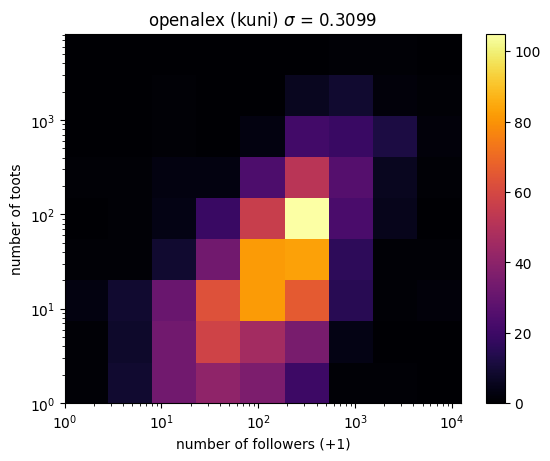

In [34]:
from scipy.stats import pearsonr
from matplotlib.colors import LogNorm

x = data['followers']
y = data['ntoots']

xbins = np.logspace(np.log10(min(x)+1), np.log10(max(x)+1), 10)
ybins = np.logspace(np.log10(min(y)), np.log10(max(y)+1), 10)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(x, y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('number of followers (+1)')
ax.set_ylabel('number of toots')

corr = pearsonr(x, y)[0]
print(corr)
plt.title('openalex (kuni) $\sigma$ = {:.4f}'.format(corr))
plt.colorbar(im[3], ax=ax)
plt.savefig('number_of_toots_number_of_followers.png')

0.02905800377586542


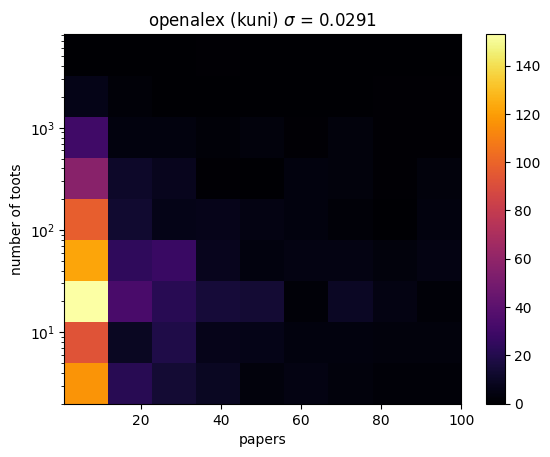

In [35]:
from matplotlib.colors import LogNorm

x = data['npapers_openalex']
y = data['ntoots']

xbins = np.linspace(min(x), 100, 10)
ybins = np.logspace(np.log10(min(y)+1), np.log10(max(y)+1), 10)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(x, y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('papers')
ax.set_ylabel('number of toots')

idxs = ~np.isnan(x)
x = x[idxs]
y = y[idxs]
corr = pearsonr(x, y)[0]
print(corr)
plt.title('openalex (kuni) $\sigma$ = {:.4f}'.format(corr))
plt.colorbar(im[3], ax=ax)
plt.savefig('number_of_papers_number_of_toots.png')

-0.08643046804752481


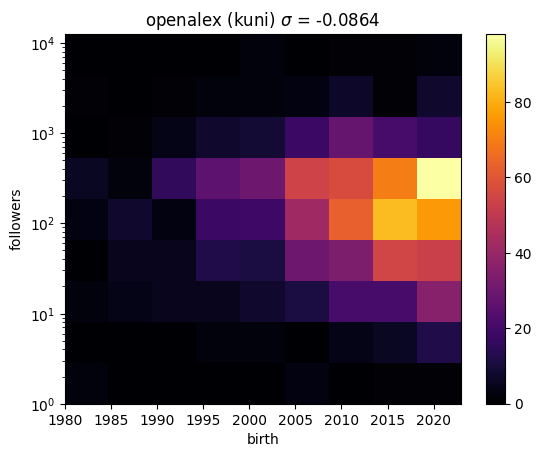

In [36]:
from matplotlib.colors import LogNorm

x = data['birth_openalex']
y = data['followers']

xbins = np.linspace(1980, max(x), 10)
ybins = np.logspace(np.log10(min(y)+1), np.log10(max(y)+1), 10)

ax = plt.gca()
ax.set_facecolor("white")
im = ax.hist2d(x, y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('birth')
ax.set_ylabel('followers')
idxs = ~np.isnan(x)
x = x[idxs]
y = y[idxs]
corr = pearsonr(x, y)[0]
print(corr)
plt.title('openalex (kuni) $\sigma$ = {:.4f}'.format(corr))
plt.colorbar(im[3], ax=ax)
plt.savefig('birth_number_of_followers.png')

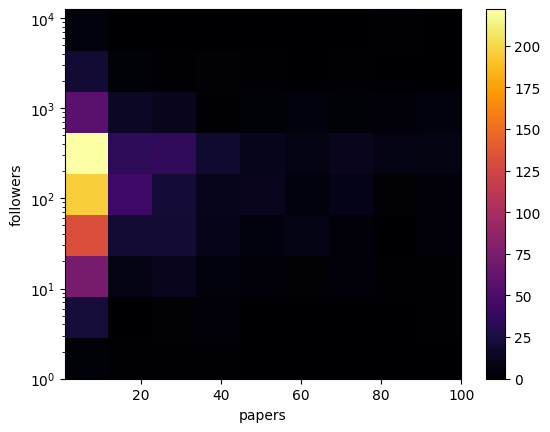

In [15]:
from matplotlib.colors import LogNorm

x = data['npapers_openalex']
y = data['followers']

xbins = np.linspace(min(x), 100, 10)
ybins = np.logspace(np.log10(min(y)+1), np.log10(max(y)+1), 10)

ax = plt.gca()
ax.set_facecolor("white")
im = ax.hist2d(x, y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('papers')
ax.set_ylabel('followers')
plt.colorbar(im[3], ax=ax)

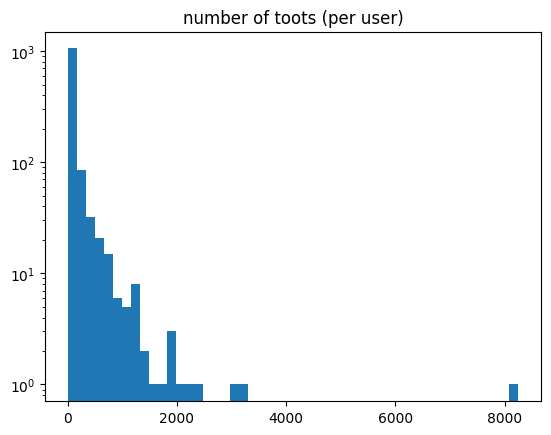

In [57]:
plt.hist(data['ntoots'], bins=50)
plt.yscale('log')
plt.title('number of toots (per user)')
plt.show()